In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import models,layers
from keras.utils import to_categorical
from PIL import Image
import numpy as np



In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
train_dir = "PlantVillage"
test_dir = "PlantVillage"
img = Image.open('/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage/Tomato_Early_blight/0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG')


In [5]:
img = img.resize((224, 224))

In [6]:
img_array = tf.keras.preprocessing.image.img_to_array(img)

In [7]:
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   
)

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(224, 224),
    batch_size=32,
   
)


Found 4500 files belonging to 3 classes.
Using 3600 files for training.


In [10]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=None,
    subset=None,
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 4500 files belonging to 3 classes.


In [11]:
for _, y in train_data:
    y_train = y
    break

In [12]:
class_names = train_data.class_names
num_classes = len(class_names)
y_train_one_hot = to_categorical(y_train, num_classes)

In [13]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [14]:
val_data = val_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=42,
    subset="validation"
)

Found 0 images belonging to 3 classes.


In [15]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [19]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [20]:
train_data_iter = train_data.as_numpy_iterator()
images, labels = next(train_data_iter)



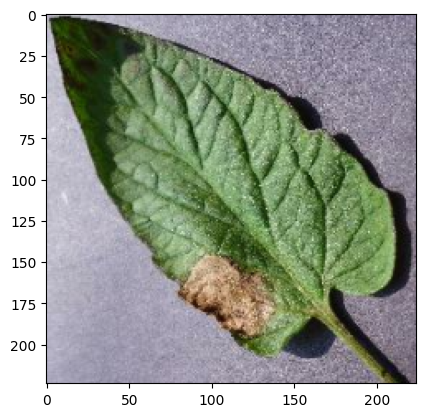

In [21]:
images, labels = next(train_data_iter)
image = images[0] # assuming you want to plot the first image in the batch
image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image)) # rescale image to [0, 1]
plt.imshow(image)
plt.show()


In [22]:
images = (images - images.min()) / (images.max() - images.min())


In [23]:
class_names = train_data.class_names

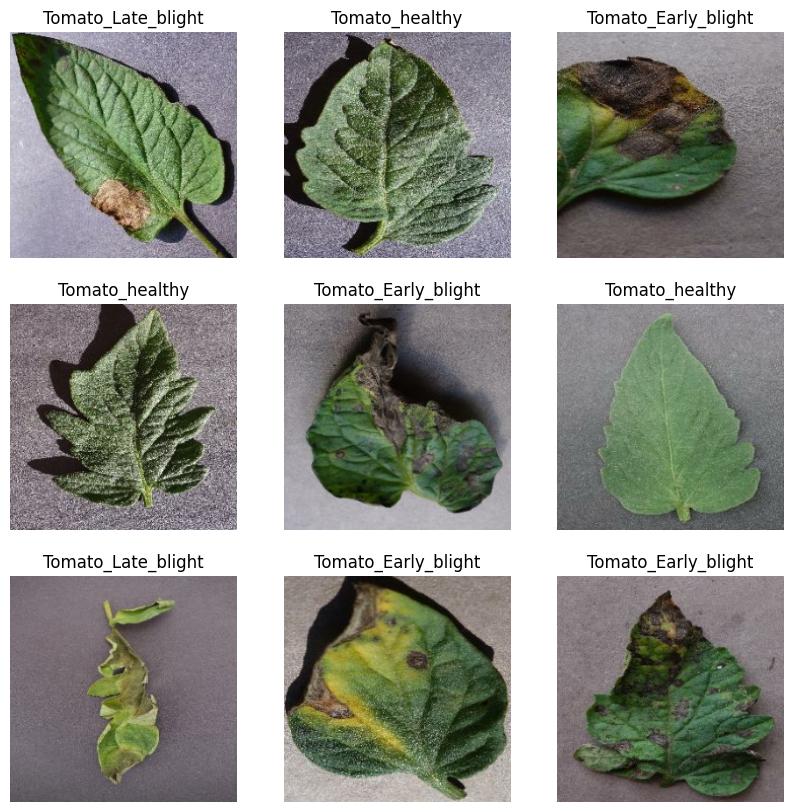

In [24]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
plt.show()

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [26]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
113/113 [==============================] - 386s 3s/step - loss: 20.1441 - accuracy: 0.6311
Epoch 2/10
113/113 [==============================] - 382s 3s/step - loss: 0.6229 - accuracy: 0.7394
Epoch 3/10
113/113 [==============================] - 382s 3s/step - loss: 0.3330 - accuracy: 0.8725
Epoch 4/10
113/113 [==============================] - 330s 3s/step - loss: 0.2973 - accuracy: 0.8889
Epoch 5/10
113/113 [==============================] - 331s 3s/step - loss: 0.1669 - accuracy: 0.9350
Epoch 6/10
113/113 [==============================] - 330s 3s/step - loss: 0.1131 - accuracy: 0.9625
Epoch 7/10
113/113 [==============================] - 330s 3s/step - loss: 0.0589 - accuracy: 0.9850
Epoch 8/10
113/113 [==============================] - 329s 3s/step - loss: 0.0707 - accuracy: 0.9794
Epoch 9/10
113/113 [==============================] - 330s 3s/step - loss: 0.0677 - accuracy: 0.9794
Epoch 10/10
113/113 [==============================] - 330s 3s/step - loss: 0.0403 - accur

In [27]:
test_loss, test_acc = model.evaluate(test_data)

141/141 [==============================] - 127s 895ms/step - loss: 0.2639 - accuracy: 0.9540


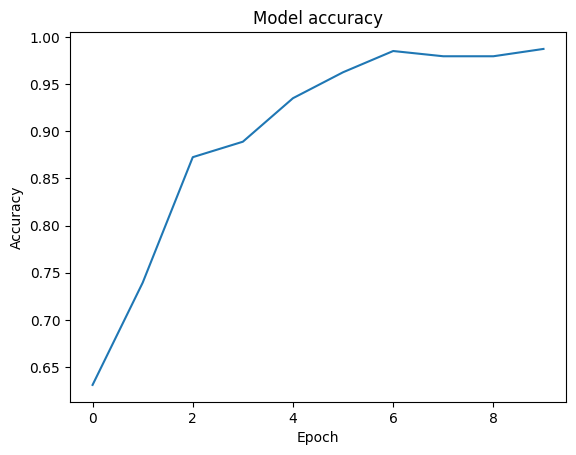

In [28]:
# Plot training accuracy only
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [29]:

def predict(model, image_path, class_names):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    class_index = np.argmax(predictions)
    class_label = class_names[class_index]
    confidence = predictions[0][class_index]
    print(f"Predicted class: {class_label}, confidence: {confidence:.2f}")

In [30]:
image_path = "/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage/Tomato_healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334.JPG"
predict(model, image_path, class_names)

1/1 [==============================] - 0s 173ms/step
Predicted class: Tomato_healthy, confidence: 0.41


In [32]:
import os
save_dir = '/Users/nathan/Desktop/Code/Resnet50'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [33]:
model.save(os.path.join(save_dir, 'my_Resnet_model.h5'))

Found 4500 files belonging to 3 classes.
Using 3600 files for training.
Found 4500 files belonging to 3 classes.
Found 0 images belonging to 3 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )        

 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv4_block2_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
          

 conv5_block1_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

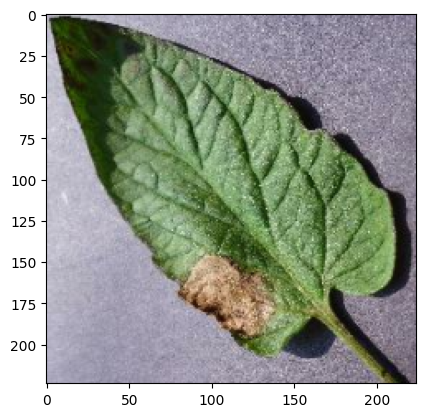

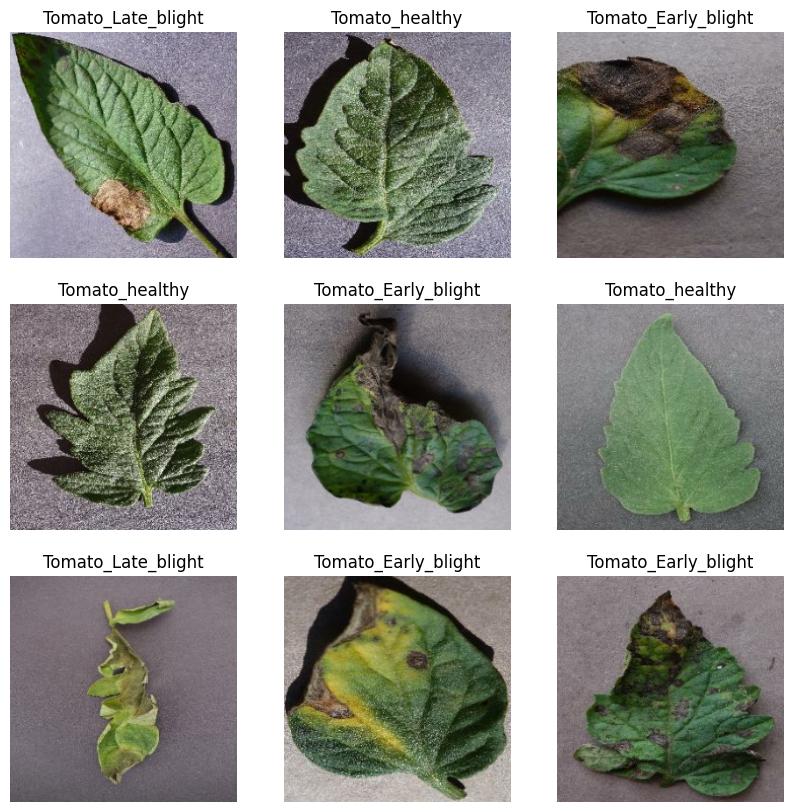

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import models, layers
from keras.utils import to_categorical
from PIL import Image
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

train_dir = "PlantVillage2"
test_dir = "PlantVillage2"
img = Image.open('/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage2/Tomato_Early_blight/0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG')


img = img.resize((224, 224))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   
)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage2",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(224, 224),
    batch_size=32,
   
)


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=None,
    subset=None,
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

for _, y in train_data:
    y_train = y
    break

class_names = train_data.class_names
num_classes = len(class_names)
y_train_one_hot = to_categorical(y_train, num_classes)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

val_data = val_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=42,
    subset="validation"
)

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

train_data_iter = train_data.as_numpy_iterator()
images, labels = next(train_data_iter)

images, labels = next(train_data_iter)
image = images[0] # assuming you want to plot the first image in the batch
image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image)) # rescale image to [0, 1]
plt.imshow(image)
plt.show()

images = (images - images.min()) / (images.max() - images.min())

class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
plt.show()





In [3]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

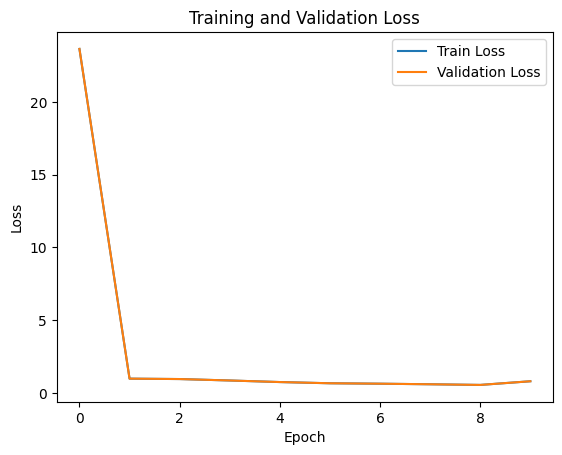

141/141 [==============================] - 163s 1s/step


ValueError: multiclass format is not supported

In [8]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Check if validation loss is available
if 'val_loss' in history.history:
    val_loss = history.history['val_loss']
else:
    val_loss = train_loss  # Use training loss as a substitute

# Check if validation accuracy is available
if 'val_accuracy' in history.history:
    val_acc = history.history['val_accuracy']
else:
    val_acc = train_acc 
# Plot training and validation accuracy
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show() 

# Retrieve true labels for the test dataset


141/141 [==============================] - 169s 1s/step


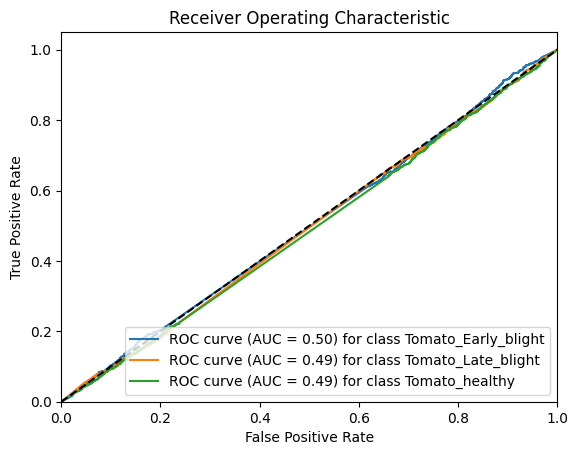

In [17]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Convert test labels to a binary matrix
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Predict probabilities for the test dataset
y_pred_prob = model.predict(test_data)

# Calculate ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[i], class_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()






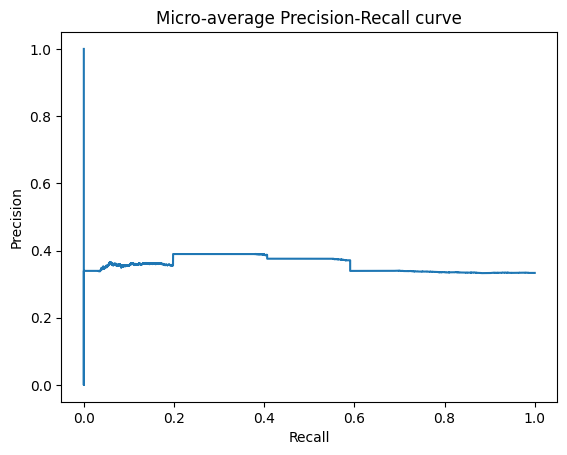

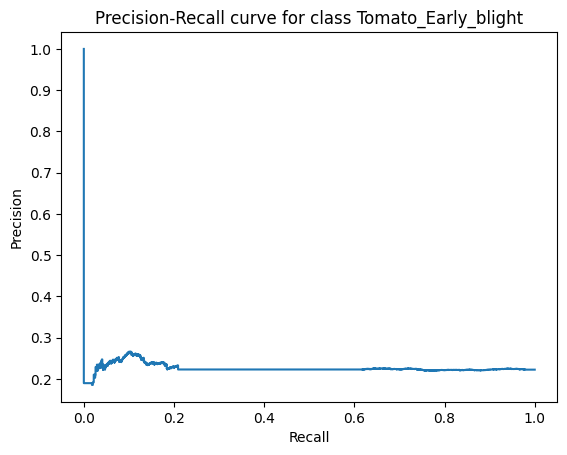

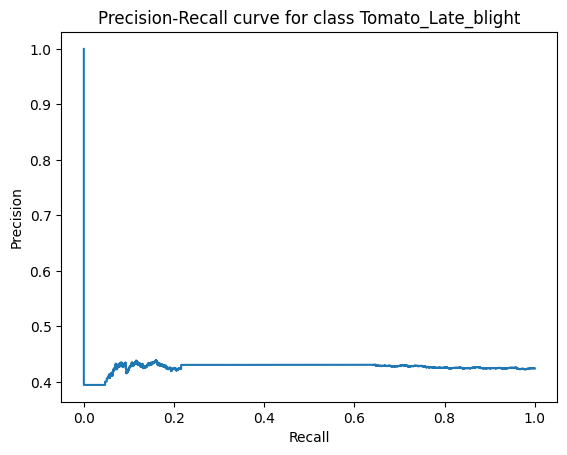

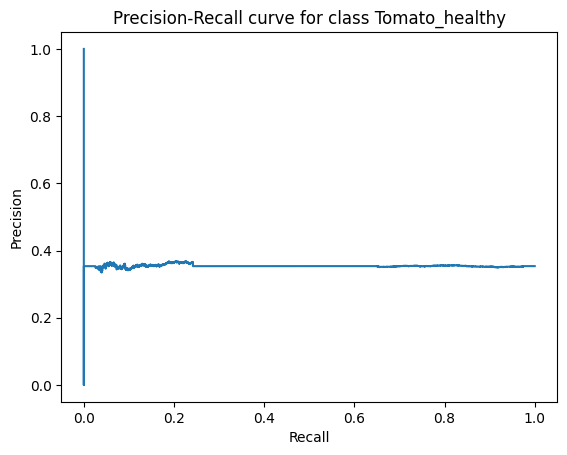

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate per-class precision and recall
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_prob[:, i])
    avg_precision[i] = average_precision_score(y_true_bin[:, i], y_pred_prob[:, i])

# Calculate micro-average precision and recall
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_bin.ravel(), y_pred_prob.ravel())
avg_precision["micro"] = average_precision_score(y_true_bin, y_pred_prob, average="micro")

# Plot precision-recall curve for each class
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-average Precision-Recall curve')
plt.show()

for i in range(num_classes):
    plt.figure()
    plt.step(recall[i], precision[i], where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for class {}'.format(class_names[i]))
    plt.show()


In [19]:
# Save the model
import os
save_dir = '/Users/nathan/Desktop/Code/Resnet50'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model.save(os.path.join(save_dir, 'my_Resnet_model.h5'))